In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Loading the Dataset**

In [177]:
df = pd.read_csv('Bitcoin_Data.csv')

# **Exploration, Cleaning & Transformation**

In [88]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [89]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [91]:
df.shape

(1792, 7)

The dataset contains 1792 rows and 7 cols and the intial datatype of all the elems is object(str)

In [92]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1792,1792,1792,1792,1792,1792,1792
unique,1792,1791,1792,1791,1792,1792,1792
top,"Sep 12, 2024","7,410.45","58,534.36","27,375.60","58,127.01","58,127.01","33,835,707,949"
freq,1,2,1,2,1,1,1


In [93]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [95]:
df_cleaned = df.drop_duplicates()


In [96]:
df_cleaned.duplicated().sum()

0

In [97]:
df_cleaned.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [98]:
df_cleaned.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1787,"Oct 22, 2019","8,243.40","8,296.65","8,074.46","8,078.20","8,078.20","16,803,377,857"
1788,"Oct 21, 2019","8,225.12","8,296.69","8,196.42","8,243.72","8,243.72","15,868,748,866"
1789,"Oct 20, 2019","7,997.81","8,281.82","7,949.44","8,222.08","8,222.08","15,504,249,442"
1790,"Oct 19, 2019","7,973.80","8,082.63","7,944.78","7,988.56","7,988.56","13,797,825,640"
1791,"Oct 18, 2019","8,100.93","8,138.41","7,902.16","7,973.21","7,973.21","15,651,592,610"


Till this step we got the info regarding the dataset and we now know that their aren't any missing vals and also the duplicated vals (if there were would have been detetcted and removed)


In [99]:
#updating the orignal dataset
df = df_cleaned


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1792 non-null   object
 1   Open       1792 non-null   object
 2   High       1792 non-null   object
 3   Low        1792 non-null   object
 4   Close      1792 non-null   object
 5   Adj Close  1792 non-null   object
 6   Volume     1792 non-null   object
dtypes: object(7)
memory usage: 98.1+ KB


In [101]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024","57,343.17","58,534.36","57,330.10","58,127.01","58,127.01","33,835,707,949"
1,"Sep 11, 2024","57,650.29","57,991.32","55,567.34","57,343.17","57,343.17","37,049,062,672"
2,"Sep 10, 2024","57,020.10","58,029.98","56,419.41","57,648.71","57,648.71","28,857,630,507"
3,"Sep 9, 2024","54,851.89","58,041.13","54,598.43","57,019.54","57,019.54","34,618,096,173"
4,"Sep 8, 2024","54,147.93","55,300.86","53,653.76","54,841.57","54,841.57","18,268,287,531"


In [102]:
#defining num_cols before hand to reuse it again instead of typing again
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [103]:
# Remove commas from numeric vals and convert cols to float
#as all the cols are in object(str) datatype
for col in num_cols:
    df[col] = df[col].str.replace(',', '').astype(float)



In [104]:
df.info() #checking again after conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1792 non-null   object 
 1   Open       1792 non-null   float64
 2   High       1792 non-null   float64
 3   Low        1792 non-null   float64
 4   Close      1792 non-null   float64
 5   Adj Close  1792 non-null   float64
 6   Volume     1792 non-null   float64
dtypes: float64(6), object(1)
memory usage: 98.1+ KB


In [105]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Sep 12, 2024",57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,"Sep 11, 2024",57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,"Sep 10, 2024",57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,"Sep 9, 2024",54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,"Sep 8, 2024",54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [106]:
# Checking outliers using IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (df[num_cols] < lower_bound) | (df[num_cols] > upper_bound)

Used IQR because of the nature of data. As crypto data is highly volatile and may not be normally distributed due to extreme fluctuations. If the data had been of other nature i.e. it was normally distributed or didn't have data with extreme fluctuation then Z score would have been a better option.

In [107]:
outliers_count = outliers.sum()
print(outliers_count)

Open          0
High          0
Low           0
Close         0
Adj Close     0
Volume       75
dtype: int64


As we can see we have 75 outliers in Volume ( which is expected to have outliers in terms of market movement), we'll ignore that because of cryptocurrency data and it's data can have volatility and sudden spikes due to the nature of the market, so there may be outliers which may be important for capturing extreme price shifts and doing predicting based on them. Also these extreme points can sometimes give us valuable insights.


In [108]:
#Transformation
# Convert Date col to datetime
df['Date']=pd.to_datetime(df['Date'])

#already converted rest of the cols as they had to be done before

In [109]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2024-09-12,57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10
1,2024-09-11,57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2,2024-09-10,57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
3,2024-09-09,54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
4,2024-09-08,54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10


In [110]:
#sorting the dates for better order
df_sorted = df.sort_values(by='Date', ascending=True)

In [111]:
df = df_sorted

In [112]:
#setting date as index
df.set_index('Date', inplace=True)

In [113]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-08,54147.93,55300.86,53653.76,54841.57,54841.57,1.826829e+10
2024-09-09,54851.89,58041.13,54598.43,57019.54,57019.54,3.461810e+10
2024-09-10,57020.10,58029.98,56419.41,57648.71,57648.71,2.885763e+10
2024-09-11,57650.29,57991.32,55567.34,57343.17,57343.17,3.704906e+10
2024-09-12,57343.17,58534.36,57330.10,58127.01,58127.01,3.383571e+10


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1792 entries, 2019-10-18 to 2024-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1792 non-null   float64
 1   High       1792 non-null   float64
 2   Low        1792 non-null   float64
 3   Close      1792 non-null   float64
 4   Adj Close  1792 non-null   float64
 5   Volume     1792 non-null   float64
dtypes: float64(6)
memory usage: 98.0 KB


In [115]:
price_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close']
volume_column = ['Volume']

No categorical cols are present in this data so no need for label/one-hot encoding

---------------------------------------------------------------------------------------------------------------------------------

# **EDA**

# Univariate Analysis:

In [116]:
continuous_vars = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']



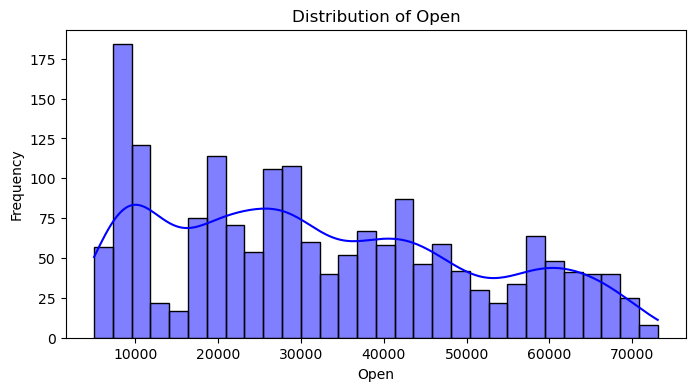

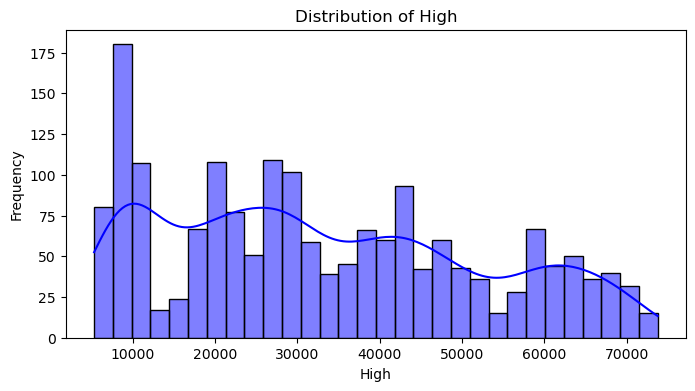

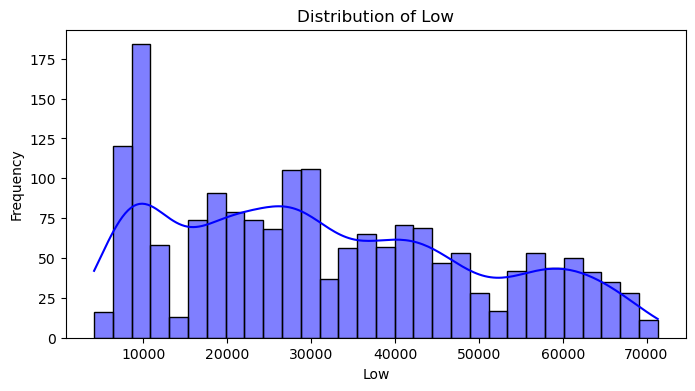

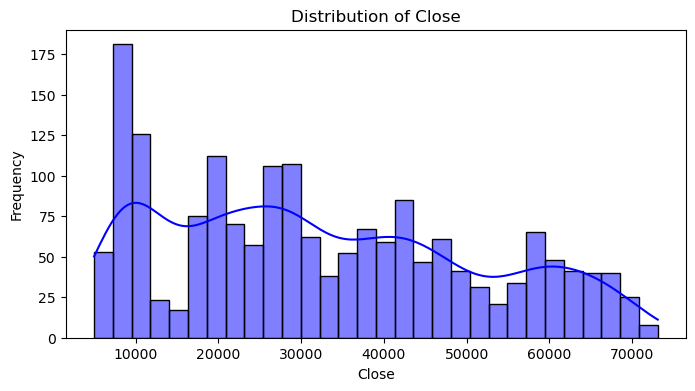

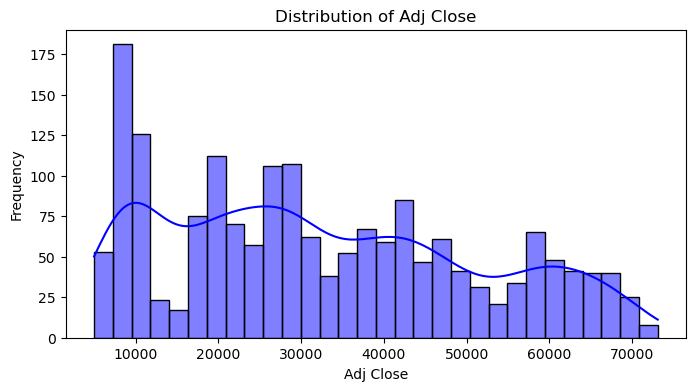

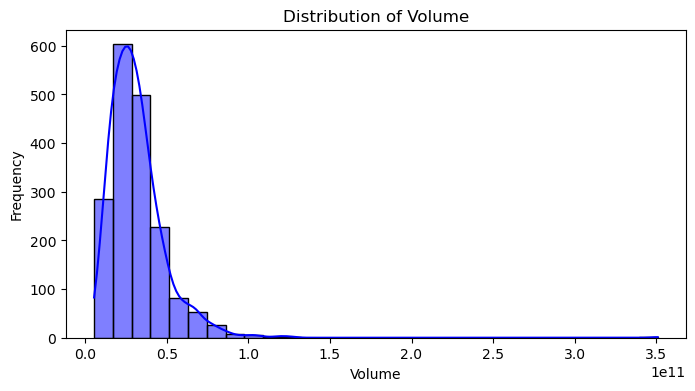

In [117]:
# Plot histograms for distribution analysis
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

extreme vals present in volume

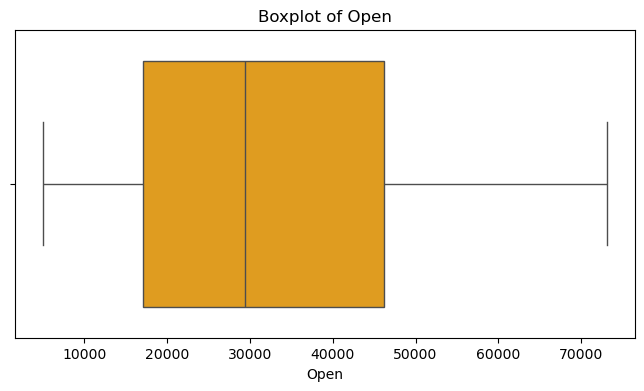

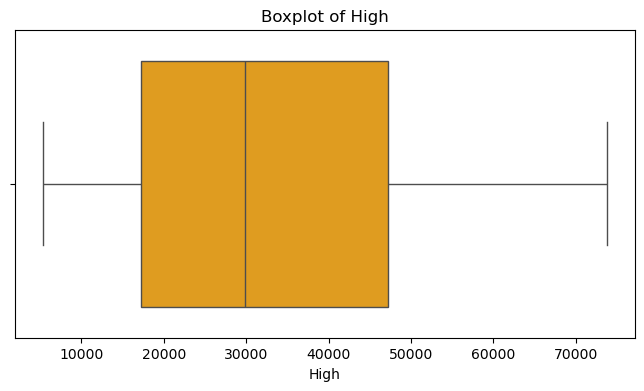

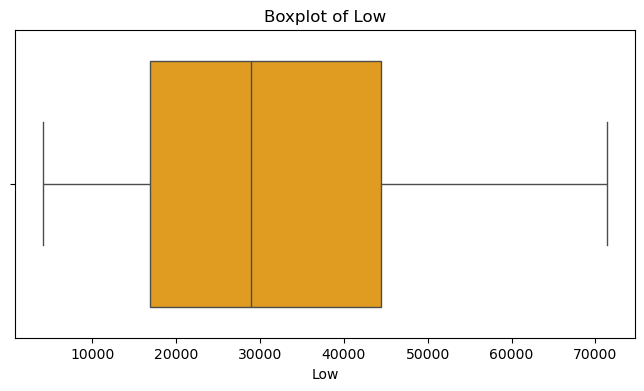

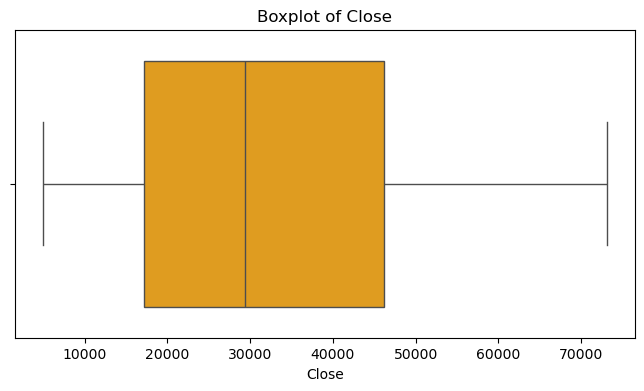

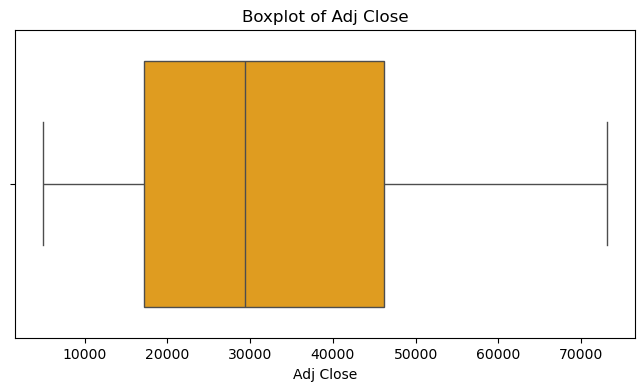

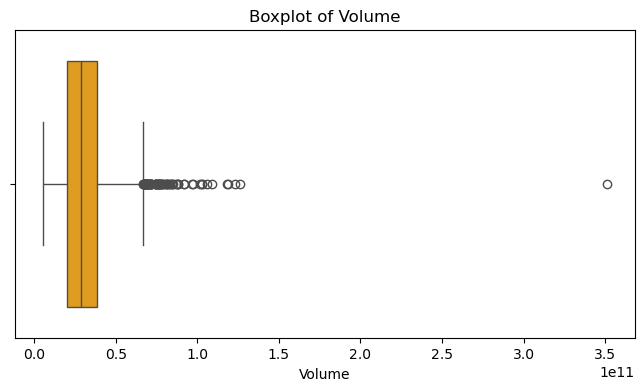

In [118]:
# Plot box plots for outlier detection
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var], color='orange')
    plt.title(f'Boxplot of {var}')
    plt.xlabel(var)
    plt.show()



outliers present in volume data, which is obvious in crypto data
also discussed before with IQR

# Bivariate and Multivariate Analysis:

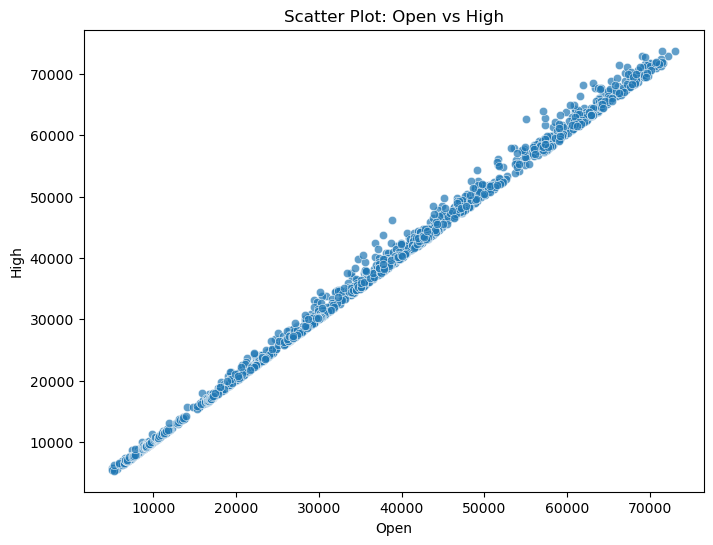

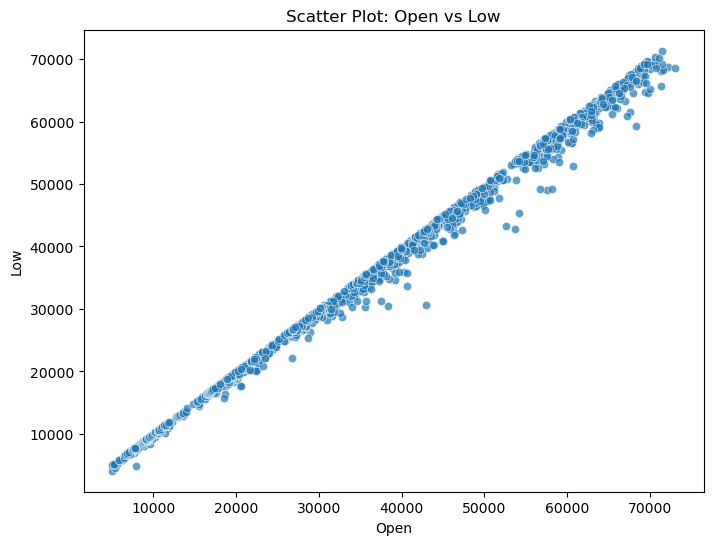

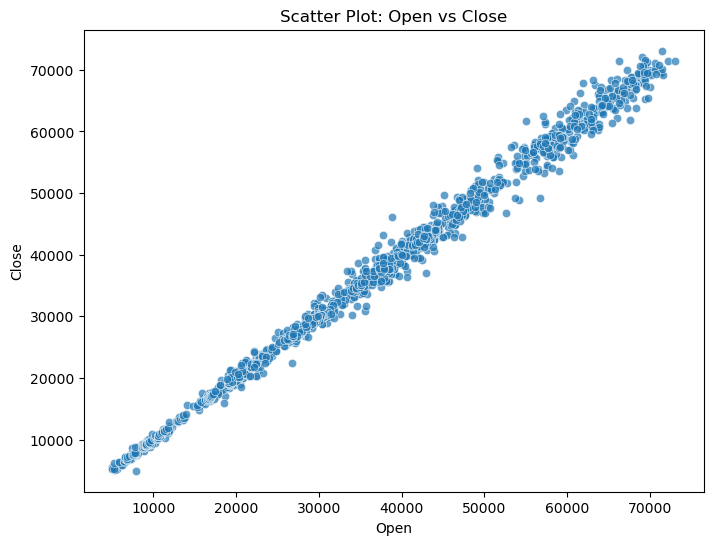

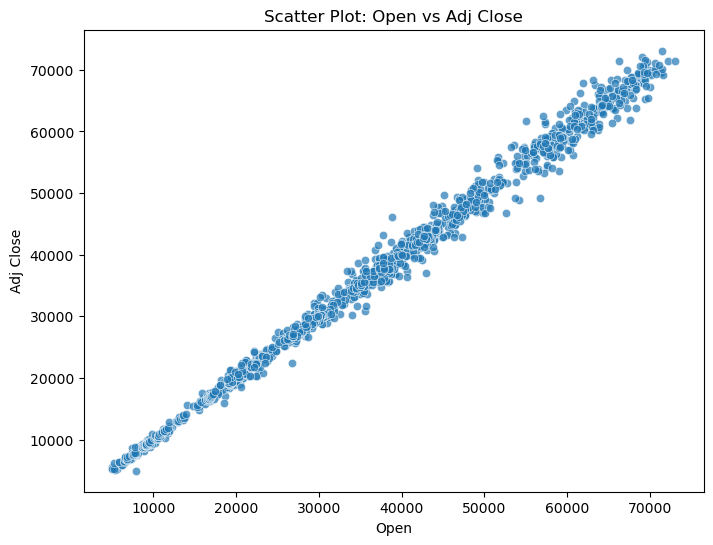

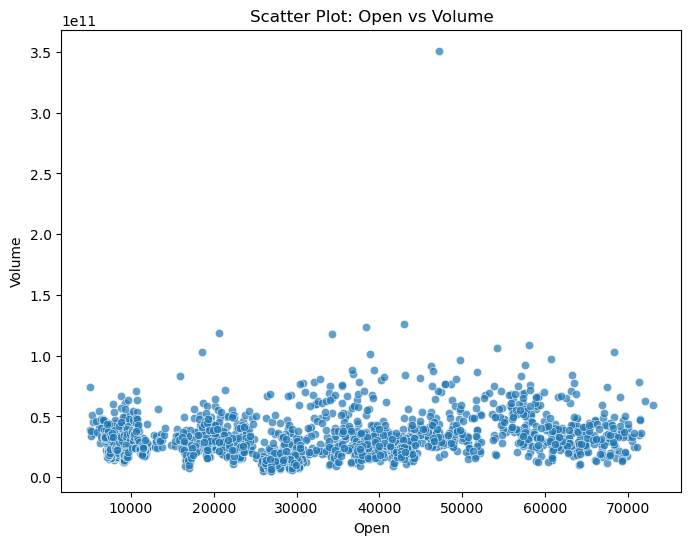

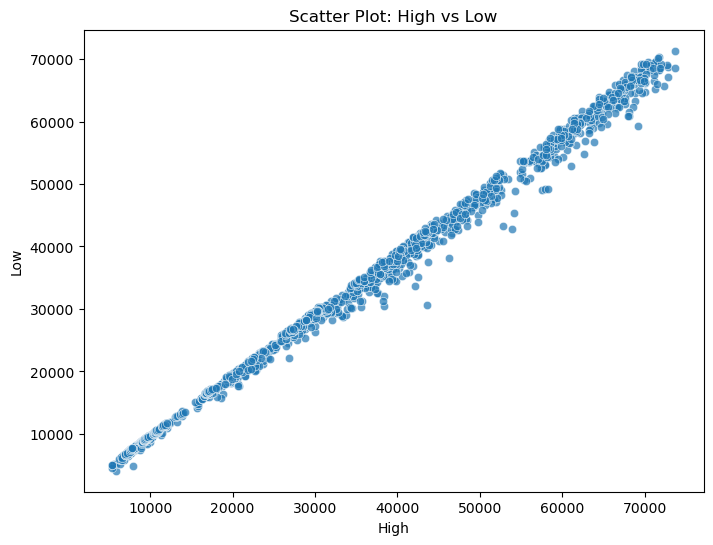

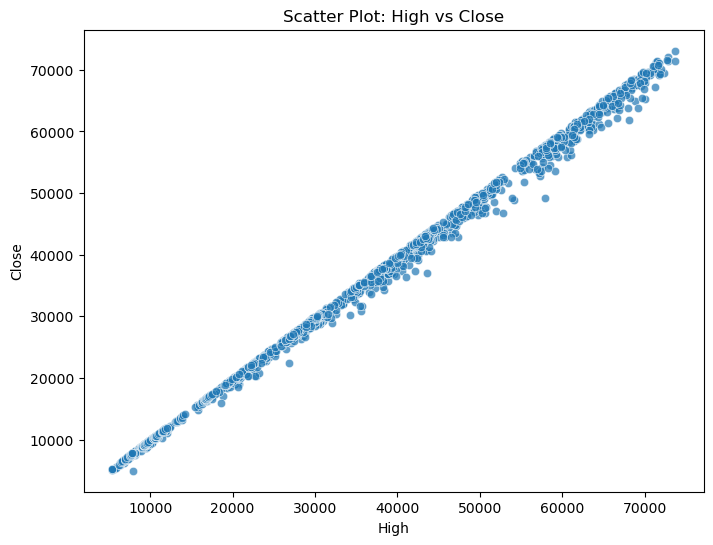

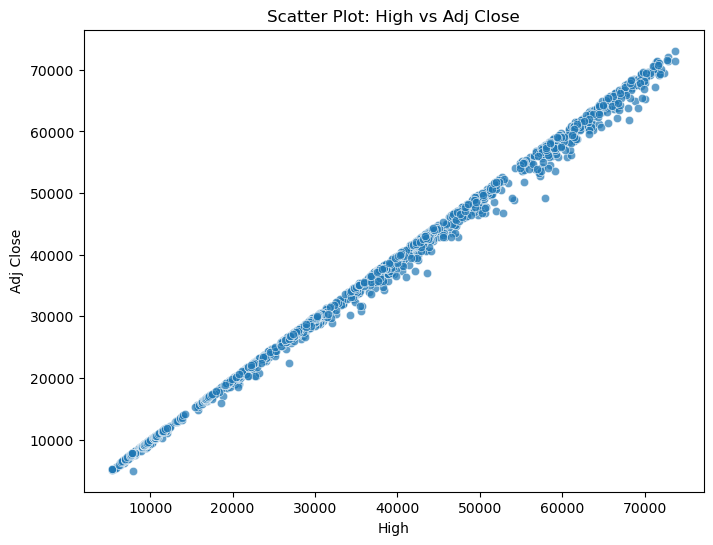

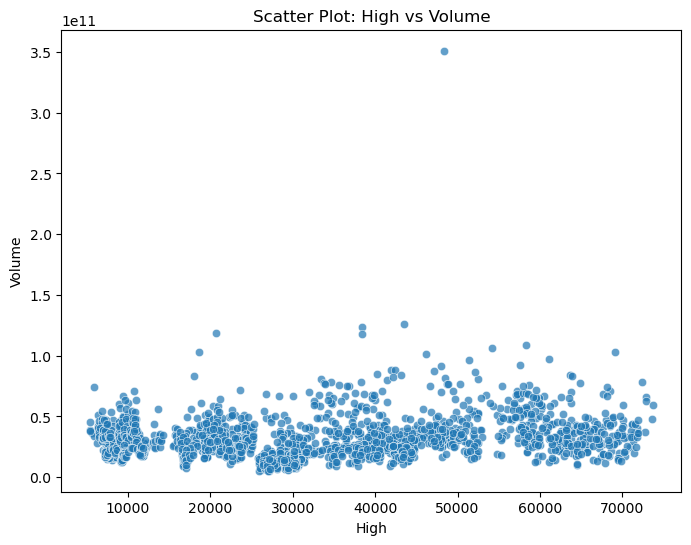

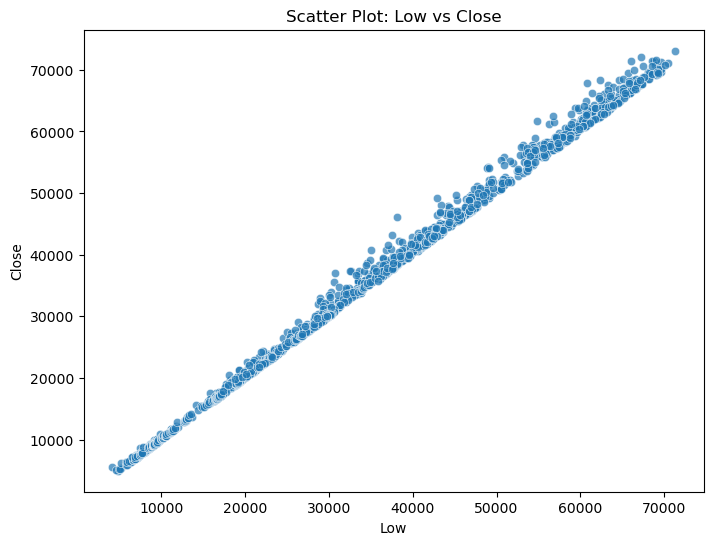

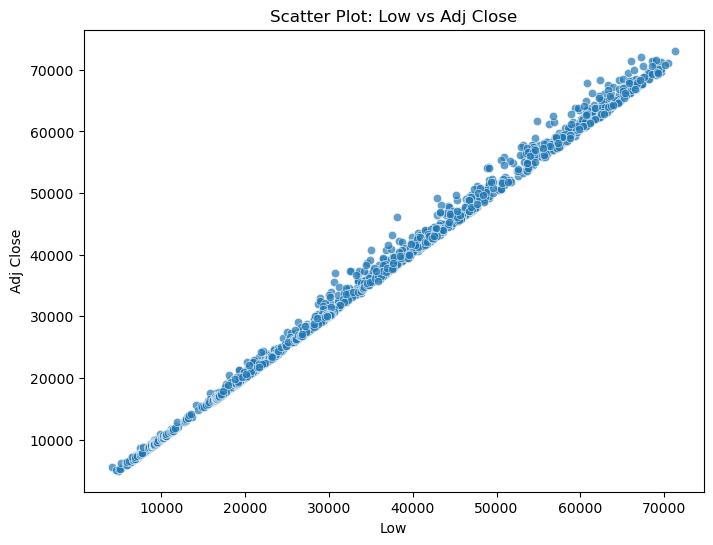

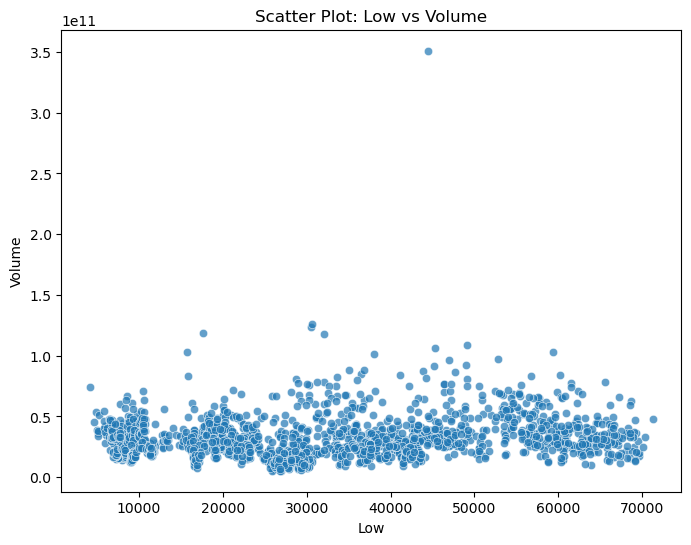

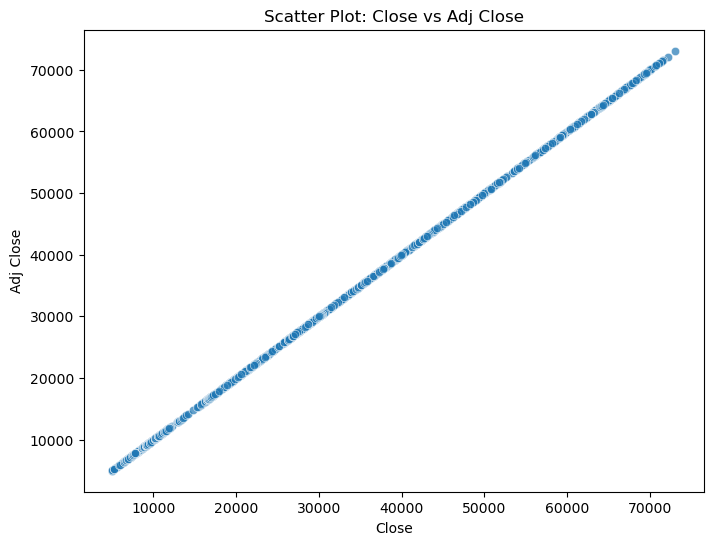

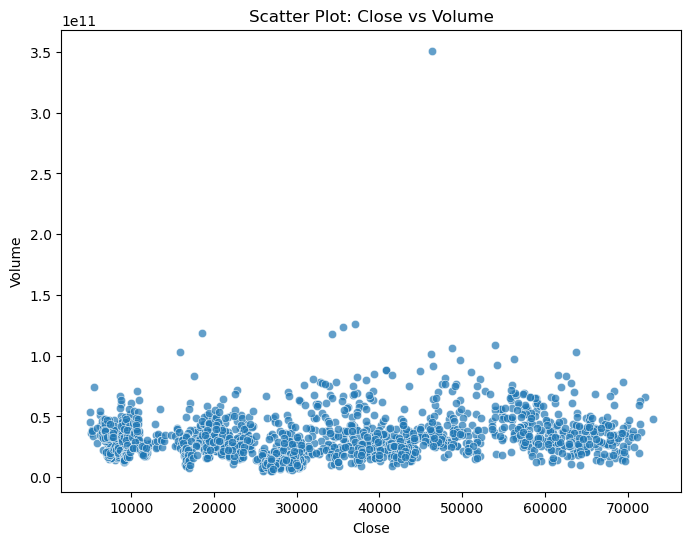

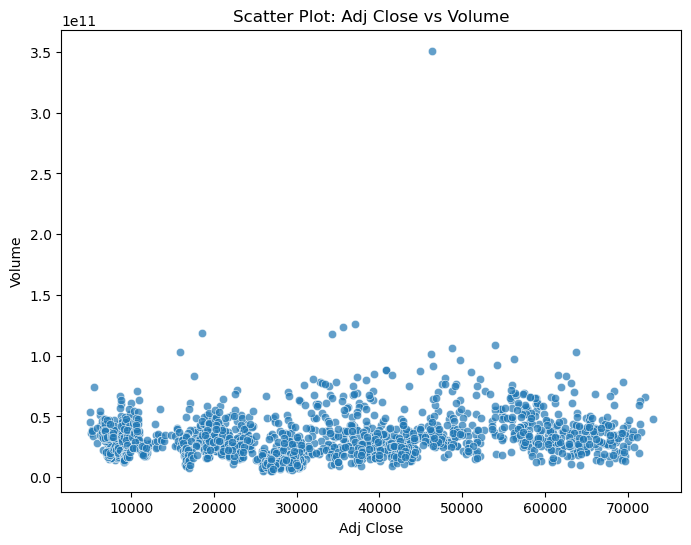

In [119]:
for i, var1 in enumerate(continuous_vars):
    for var2 in continuous_vars[i + 1:]:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[var1], y=df[var2], alpha=0.7)
        plt.title(f'Scatter Plot: {var1} vs {var2}')
        plt.xlabel(var1)
        plt.ylabel(var2)
        plt.show()



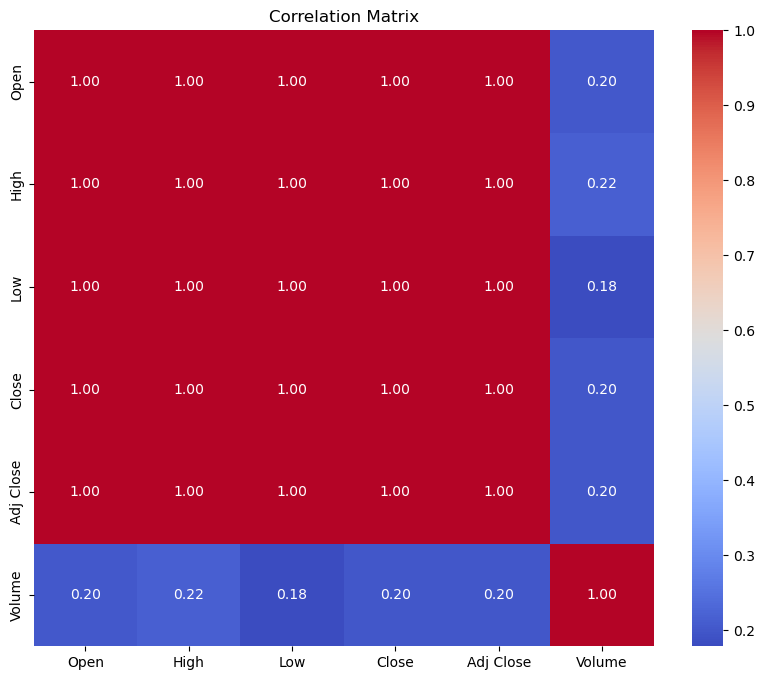

In [120]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[continuous_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()



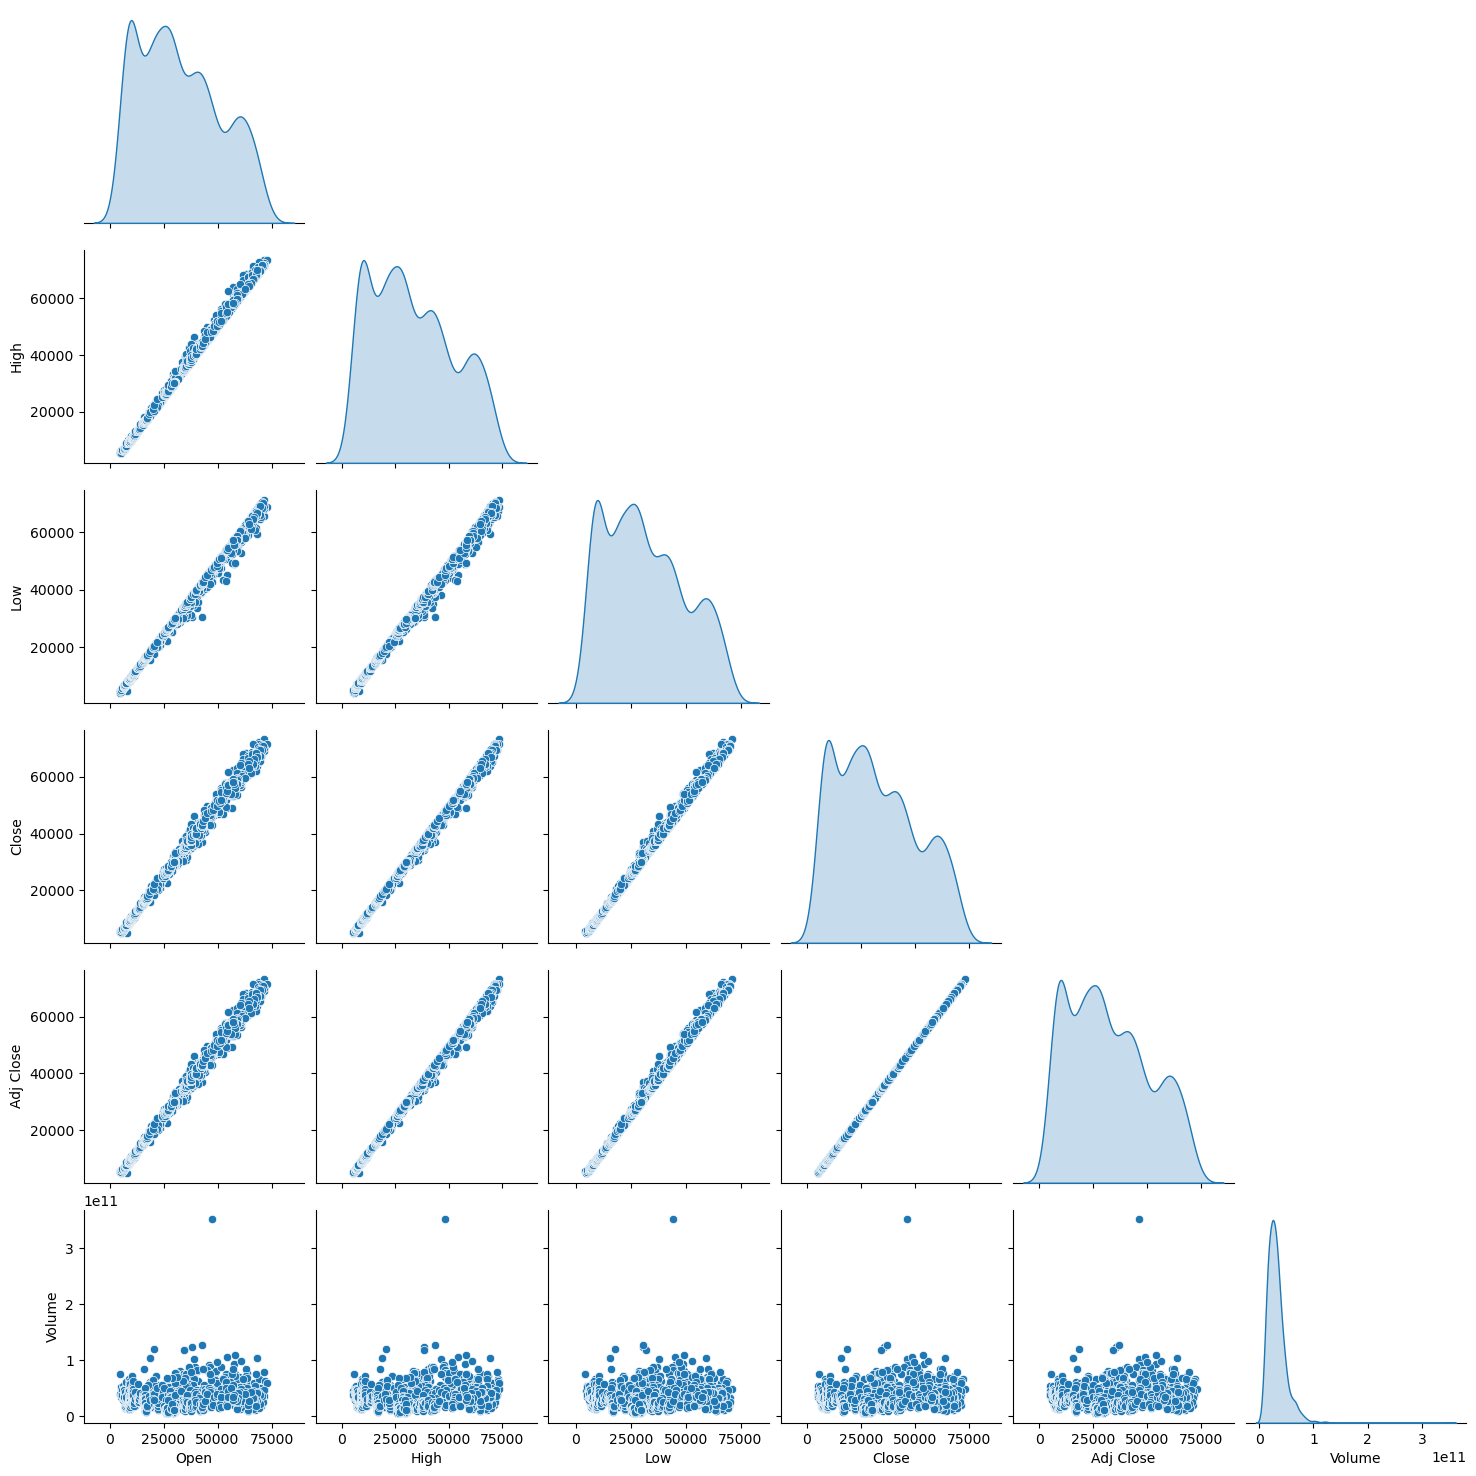

In [121]:
# Pair Plots for Multivariate Analysis
sns.pairplot(df[continuous_vars], diag_kind='kde', corner=True)
plt.show()


# Feature Analysis

In [122]:
target = 'Close'

In [123]:
# Calculate correlations
for col in continuous_vars:
    corr = df[col].corr(df[target])
    print(f'Correlation between {col} and target (Close): {corr:.2f}')



Correlation between Open and target (Close): 1.00
Correlation between High and target (Close): 1.00
Correlation between Low and target (Close): 1.00
Correlation between Close and target (Close): 1.00
Correlation between Adj Close and target (Close): 1.00
Correlation between Volume and target (Close): 0.20


# Train Test Split


Done along with models

# Standardization

Applied before implementing the models

# **MODELS**

# ML MODEL

Linear Regression

In [162]:
def create_sequences_LR(data, target, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i].flatten())  # Flatten to make it suitable for Linear Regression
        y.append(target[i])
    return np.array(X), np.array(y)

Linear Regression - MAE: 929.2586175664173, MSE: 2259829.8699618108, R²: 0.9931274766297611


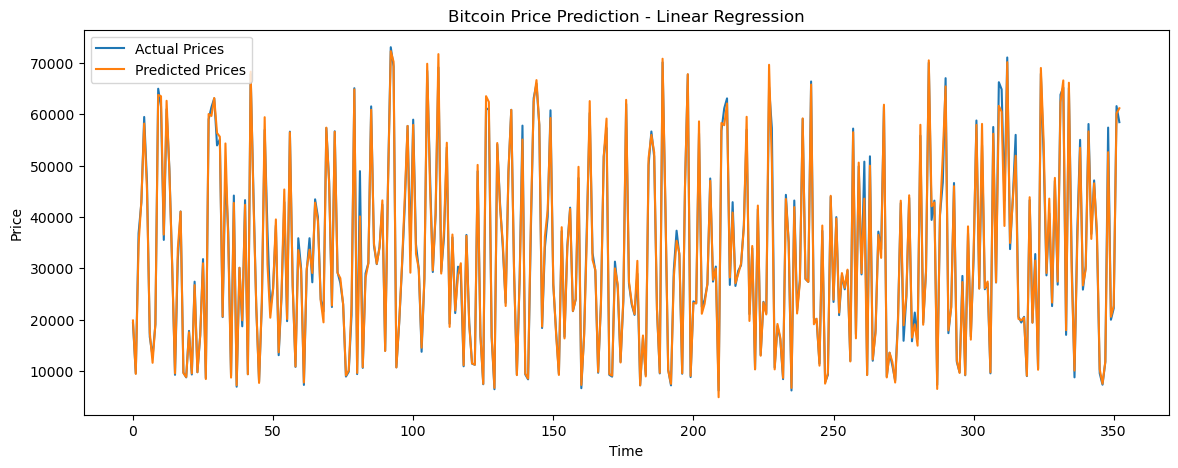

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Volume']])

scaler_target = StandardScaler()
scaled_target = scaler_target.fit_transform(df[['Close']].values)

X_seq, y_seq = create_sequences_LR(scaled_data, scaled_target.flatten(), seq_length=30)

# Train-test split
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)

#Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions on the test set
predicted_prices_lr = lr_model.predict(X_test_lr)

# Inverse scaling of predicted prices using the target
predicted_prices_inverse_lr = scaler_target.inverse_transform(predicted_prices_lr.reshape(-1, 1))
actual_prices_inverse_lr = scaler_target.inverse_transform(y_test_lr.reshape(-1, 1))

# Calculate Scores
mae_lr = mean_absolute_error(actual_prices_inverse_lr, predicted_prices_inverse_lr)
mse_lr = mean_squared_error(actual_prices_inverse_lr, predicted_prices_inverse_lr)
r2_lr = r2_score(actual_prices_inverse_lr, predicted_prices_inverse_lr)
print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}')

# Plotting predicted vs actual prices for Linear Regression
plt.figure(figsize=(14, 5))
plt.plot(actual_prices_inverse_lr, label='Actual Prices')
plt.plot(predicted_prices_inverse_lr, label='Predicted Prices')
plt.title('Bitcoin Price Prediction - Linear Regression')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# LSTM

In [ ]:
def create_sequences(data, target, seq_length=30):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])
        y.append(target[i])
    return np.array(X), np.array(y)

Epoch 1/100


c:\Users\Abdul\anaconda3\envs\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - loss: 0.0815 - mae: 0.1964 - val_loss: 0.0127 - val_mae: 0.0882 - learning_rate: 0.0010
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step - loss: 0.0125 - mae: 0.0787 - val_loss: 0.0035 - val_mae: 0.0433 - learning_rate: 0.0010
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - loss: 0.0092 - mae: 0.0663 - val_loss: 0.0029 - val_mae: 0.0361 - learning_rate: 0.0010
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0080 - mae: 0.0600 - val_loss: 0.0032 - val_mae: 0.0413 - learning_rate: 0.0010
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0091 - mae: 0.0653 - val_loss: 0.0026 - val_mae: 0.0349 - learning_rate: 0.0010
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 0.0074 - mae: 0.0595 - val_loss: 0.0028 - val_mae: 0.0350 - learning_rate: 0.0010
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0068 - mae: 0.0568 - val_loss: 0.0030 - val_mae: 0.0388 - learning_rate: 0.0010
Epoch 8/100
45/45

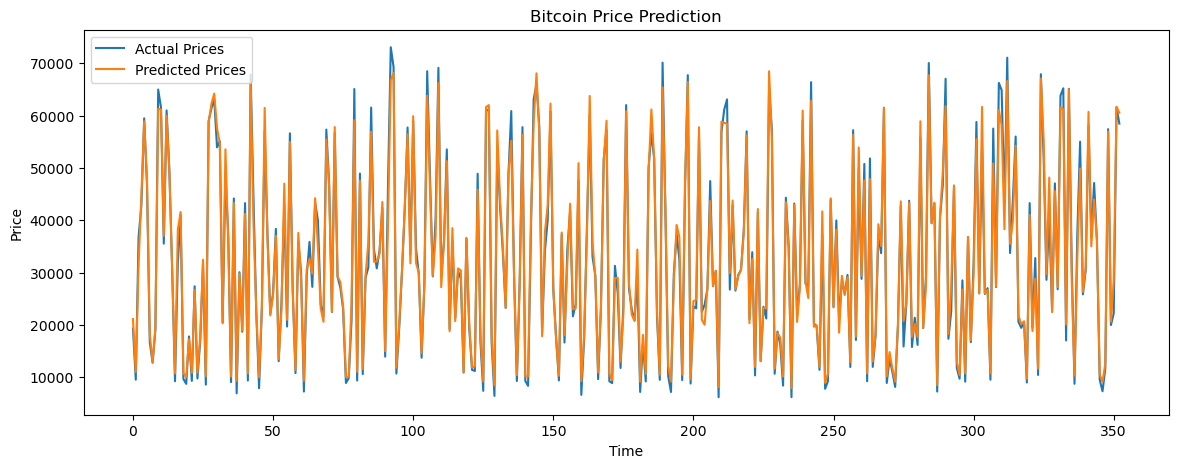

In [ ]:
#scaling for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Adj Close', 'Volume']])

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(df[['Close']].values)

X_seq, y_seq = create_sequences(scaled_data, scaled_target.flatten(), seq_length=30)

# Train-test split
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


model = Sequential([
    LSTM(128, return_sequences=True, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.3),
    LSTM(128, return_sequences=True, activation='relu'),
    Dropout(0.3),
    LSTM(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Training the model
history = model.fit(X_train_lstm, y_train_lstm,
                    epochs=100,
                    batch_size=32,
                    validation_data=(X_test_lstm, y_test_lstm),
                    callbacks=[early_stopping, reduce_lr])

# Evaluate the model on test data
predicted_prices = model.predict(X_test_lstm)

# Reshape predicted prices for inverse transformation on target
predicted_prices_reshaped = predicted_prices.reshape(-1, 1)

# Inverse scaling of predicted prices using only the target
predicted_prices_inverse = scaler_target.inverse_transform(predicted_prices_reshaped)

# Plotting predicted vs actual prices
plt.figure(figsize=(14, 5))
plt.plot(scaler_target.inverse_transform(y_test_lstm.reshape(-1, 1)), label='Actual Prices')
plt.plot(predicted_prices_inverse, label='Predicted Prices')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [154]:
actual_prices_inverse = scaler_target.inverse_transform(y_test_lstm.reshape(-1, 1))


In [155]:
mae_lstm = mean_absolute_error(actual_prices_inverse, predicted_prices_inverse)
mse_lstm = mean_squared_error(actual_prices_inverse, predicted_prices_inverse)
r2_lstm = r2_score(actual_prices_inverse, predicted_prices_inverse)

# **RESULTS**

In [164]:
# Comparing the performance of both models
print(f'Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, R²: {r2_lr}')
print(f'LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}, R²: {r2_lstm}')


Linear Regression - MAE: 929.2586175664173, MSE: 2259829.8699618108, R²: 0.9931274766297611
LSTM - MAE: 1644.3502103620751, MSE: 5081434.729740551, R²: 0.9845465008677508


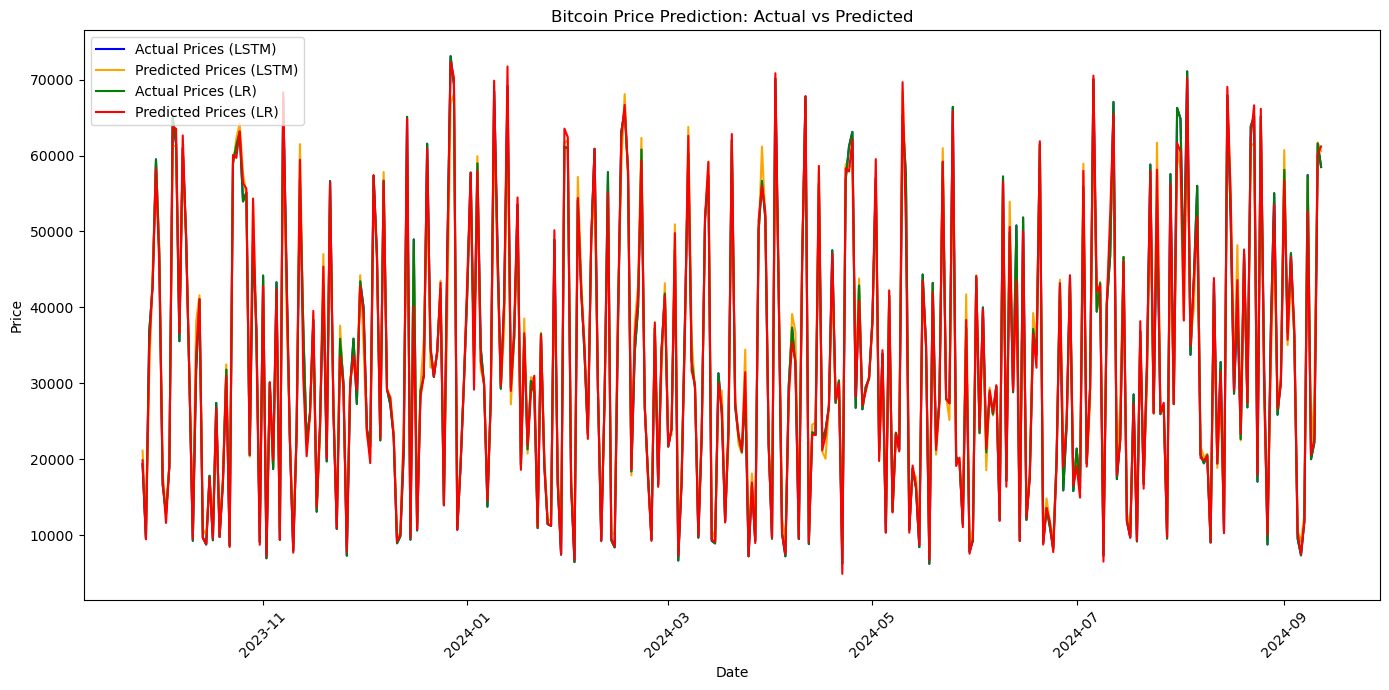

In [ ]:
# Get dates corresponding to the test set
test_dates = df.index[-len(actual_prices_inverse_lr):] 

plt.figure(figsize=(14, 7))
plt.plot(test_dates, actual_prices_inverse[-len(test_dates):], label='Actual Prices (LSTM)', color='blue')
plt.plot(test_dates, predicted_prices_inverse[-len(test_dates):], label='Predicted Prices (LSTM)', color='orange')
plt.plot(test_dates, actual_prices_inverse_lr[-len(test_dates):], label='Actual Prices (LR)', color='green')
plt.plot(test_dates, predicted_prices_inverse_lr[-len(test_dates):], label='Predicted Prices (LR)', color='red')

plt.title('Bitcoin Price Prediction: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Both models give almost similar results , but the Linear Regression model gives a slightly better fit. The R-squared value for the Linear Regression model is 0.999, which means that the model explains almost 100% of the variance in the data.

Linear Regression outperforms LSTM in all three metrics:

->Slightly Lower MAE (better average prediction accuracy).

->Slightly Lower MSE (fewer large errors).

->Slightly Higher R² (better explanation of variance).